In [313]:
# library for trigonometry and square-root only
import math

In [393]:
class QuantumProgram:
    
    # Identity matrix
    I=[[1,0],[0,1]]
    
    # Zero  vector
    zero_vector=[[1],[0]]
    

    # defining no of qubits, unitary matrix, initial tensored product 
    def __init__(self,no_of_qubits):
        
        # defining no of qubits
        self.no_of_qubits=no_of_qubits
        
        # list containing the basis states according to no_of_qubits
        # for 2 qubits basis=['00','01','10','11']
        basis=[]
        
        # Identity tensor for initial unitary matrix
        mat= [[1]]
        
        # Identity tensor for initial state_vector
        state_vector=[[1]]
        
        for i in range(self.no_of_qubits):
            mat=self.Tensor_matrix(mat,self.I)
            state_vector=self.Tensor_matrix(state_vector,self.zero_vector)
            
        self.unitary=mat
        self.state_vector=state_vector
        
        for i in range(2**self.no_of_qubits):
            basis.append(self.basis_state(i))
        self.basis=basis
        
    # method which converts decimal to binary and length of bit string is no_of_qubits
    
    def basis_state(self,n):
        a=[]
        if n>0:
            while(n>0):
                dig=n%2
                a.append(dig)
                n=n//2
        else:
            a=[0]
        a.reverse()
        while(len(a)!=self.no_of_qubits):
            a=[0]+a
        str_=''
        for i in a:
            str_+=str(i)
        return str_
    
    # Method to multiply vectors with matrix
    def vector_mat_mul(self,v,G):
        result=[]
        for i in range(len(G[0])):
            total=0
            for j in range(len(v)):
                total+= v[j][0]*G[i][j]
            result.append([total])
        return result
    
    # Method to multiply matrix with matrix
    def mat_mat_mul(self,mat1,mat2):
        res = [[0 for x in range(len(mat2[0]))] for y in range(len(mat1))]  
  
     
        for i in range(len(mat1)): 
            for j in range(len(mat2[0])): 
                for k in range(len(mat2)): 

                    # resulted matrix 
                    res[i][j] += mat1[i][k] * mat2[k][j] 
        return res
    # Single-qubit H-gate
    
    def h(self,qubit_index):
        H_operator=[[1/math.sqrt(2),1/math.sqrt(2)],[1/math.sqrt(2),-1/math.sqrt(2)]]
        pdt=[[1]]
        for i in range(self.no_of_qubits-1,-1,-1):
            
            if i!=qubit_index:
                pdt= self.Tensor_matrix(pdt,self.I)
            else:
                pdt=self.Tensor_matrix(pdt,H_operator)
        self.unitary = self.mat_mat_mul(pdt,self.unitary)
        #self.state_vector = self.vector_mat_mul(self.state_vector,self.unitary)
        return 0
    
        
    # Single-qubit X-gate
    
    def x(self,qubit_index):
        x_operator=[[0,1],[1,0]]
        pdt=[[1]]
        for i in range(self.no_of_qubits-1,-1,-1):
            
            if i!=qubit_index:
                pdt= self.Tensor_matrix(pdt,self.I)
            else:
                pdt=self.Tensor_matrix(pdt,x_operator)
        self.unitary = self.mat_mat_mul(pdt,self.unitary)
        #self.state_vector = self.vector_mat_mul(self.state_vector,self.unitary)
        return 0
        
    # Single-qubit Z-gate
    def z(self,qubit_index):
        z_operator=[[1,0],[0,-1]]
        pdt=[[1]]
        for i in range(self.no_of_qubits-1,-1,-1):
            
            if i!=qubit_index:
                pdt= self.Tensor_matrix(pdt,self.I)
            else:
                pdt=self.Tensor_matrix(pdt,z_operator)
        self.unitary = self.mat_mat_mul(pdt,self.unitary)
        #self.state_vector = self.vector_mat_mul(self.state_vector,self.unitary)
        return 0
        
    # Single-qubit Rotation gate, the angle should be in radians
    
    def rotation(self,angle,qubit_index):
        operator=[[math.cos(angle), -math.sin(angle)],[math.sin(angle),math.cos(angle)]]
        pdt=[[1]]
        for i in range(self.no_of_qubits-1,-1,-1):
            
            if i!=qubit_index:
                pdt= self.Tensor_matrix(pdt,self.I)
            else:
                pdt=self.Tensor_matrix(pdt,operator)
        self.unitary = self.mat_mat_mul(pdt,self.unitary)
        #self.state_vector = self.vector_mat_mul(self.state_vector,self.unitary)
        return 0   
    
    # method to calculate the tensor product of 2 vectors
    
    def Tensor_vector(self, A , B ):

        rowa=len(A)
        rowb=len(B)
        C = [[0] for i in range(rowa * rowb)]

        # i loops till rowa
        for i in range(0, rowa):

            # k loops till rowb
            for j in range(0, rowb):
                
                C[2*i + j][0] = A[i][0]* B[j][0]
                       

        return C 
    
    
    # method to calculate the tensor product of 2 matrices
    
    def Tensor_matrix(self, A , B ):
        if type(A[0])==int:
            cola=0
        else:
            cola = len(A[0])
        rowa = len(A)
        if type(B[0])==int:
            colb=0
        else:
            colb = len(B[0])
        rowb = len(B)

        C = [[0 for j in range(cola * colb)] for i in range(rowa * rowb)]
        
        # i loops till rowa
        for i in range(0, rowa):

            # j loops till cola
            for j in range(0, cola):

                # k loops till rowb
                for k in range(0, rowb):

                    # l loops till colb
                    for l in range(0, colb):

                        # Each element of matrix A is
                        # multiplied by whole Matrix B
                        # respectively and stored in Matrix C
                        C[2*i + k][2*j + l] = A[i][j] * B[k][l]
                       
        return C 
            
    # Methods for Simulating the circuit
    
    # Method that returns a single unitary matrix (quantum operator) equivalant to all defined 
    # quantum operators until this point

    def read_unitary(self,decimals=3):
        for row in self.unitary:
            column = ""
            for entry in row:
                column = column + str(round(entry,decimals)) + " "
            print(column)
        #print(self.unitary)
        
        
    # Method that returns the current quantum state of circuit.  
    
    def read_state(self,decimals=3):
        self.state_vector=self.vector_mat_mul(self.state_vector,self.unitary)
        for i in self.state_vector:
            print(str(round(i[0],decimals)))
        #print(self.state_vector)
    
    # Return the probabilisties of observing the basis states if all qubits 
    # are measured at this moment.
    
    def observing_probabilities(self):
        prob={}
        for i in range(int(math.pow(2,self.no_of_qubits))):
            prob[self.basis[i]]=round((self.state_vector[i][0])**2,3)
        print(prob)
        
    def execute(self, the_number_of_shots):
#         outcome={}
#         for i in range(the_number_of_shots):
#             d
        pass
    

In [395]:
My_qc=QuantumProgram(1) # 1 qubit quantum circuit created

My_qc.x(0)
My_qc.h(0)
My_qc.z(0)

print("Current state is:")
My_qc.read_state()
print()

print("Current unitary matrix is: ")
My_qc.read_unitary()
print()

print("Observed probabilities are: ")
My_qc.observing_probabilities()
print()

Current state is:
0.707
0.707

Current unitary matrix is: 
0.707 0.707 
0.707 -0.707 

Observed probabilities are: 
{'0': 0.5, '1': 0.5}



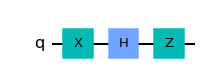

In [396]:
# now performing same on actual simulator to compare results:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)

qc.x(0)
qc.h(0)
qc.z(0)

qc.draw(output='mpl',reverse_bits=True)

In [398]:
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc)
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(current_quantum_state[i].real)
print()

the state vector is
0.7071067811865476
0.7071067811865476



In [397]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3)
print("Unitary matrix is:")
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)

Unitary matrix is:
0.707 0.707 
0.707 -0.707 
